# **IBL - Processed Widefield Imaging Data**

This tutorial shows how to access data from <[DANDI:00XXXX](https://dandiarchive.org/dandiset/00XXXX/draft)> for the IBL widefield dataset.

## Study Overview

[TODO add description]

## Contents

1. [Setup and Data Access](#setup)
2. [Session and Subject Metadata](#metadata)
3. [Processed Imaging Data and Metadata](#processed)
4. [Landmarks](#landmarks)

---

# 1. Setup and Data Access <a id="setup"></a>

## Import Required Libraries

In [2]:
# Core data manipulation and analysis
import numpy as np
# Visualization
import matplotlib.pyplot as plt

# NWB access
from pynwb import read_nwb

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Read NWB file from local path

You can read the NWB file from a local path using `pynwb.read_nwb()`.

In [3]:
subject_id = "CSK-im-011"  # Example subject
session_id = "84565bbe-fd4c-4bdb-af55-968d46a4c424"  # EID for the session

# Read NWB file from local path
nwbfile_path = f"/Volumes/T9/data/IBL/nwbfiles/processed/sub-{subject_id}_ses-{session_id}.nwb"
nwbfile = read_nwb(nwbfile_path)

---

# 2. Session and Subject Metadata <a id="metadata"></a>

In [4]:
print("=== SESSION INFORMATION ===")
print(f"Experiment description:\n {nwbfile.experiment_description}")
print(f"Session description:\n {nwbfile.session_description}")
print(f"Session start time:\n {nwbfile.session_start_time}")

print("\n=== SUBJECT INFORMATION ===")
print(f"ID: {nwbfile.subject.subject_id}")
print(f"Age: {nwbfile.subject.age}")
print(f"Strain: {nwbfile.subject.species}")
print(f"Genotype: {nwbfile.subject.genotype}")
print(f"Sex: {nwbfile.subject.sex}")

=== SESSION INFORMATION ===
Experiment description:
 None
Session description:
 A rich text description of the experiment. Can also just be the abstract of the publication.
Session start time:
 2020-01-01 00:00:00-05:00

=== SUBJECT INFORMATION ===
ID: a_subject_id
Age: TBD
Strain: Mus musculus
Genotype: None
Sex: U


---

# 3. Processed Imaging Data and Metadata <a id="processed"></a>

## Uncorrected Temporal components

The uncorrected fluorescence data are stored in the `ophys` processing module as `RoiResponseSeries` and `RoiResponseSeriesIsosbestic` objects within the "Fluorescence" container.

Data shape
- Arrays are shaped `(time, num_components)` — the first dimension is time (frame), the second is the number of components.

Series names
- Calcium (470 nm): `RoiResponseSeries`
- Isosbestic (405 nm): `RoiResponseSeriesIsosbestic`

Access example
```python
response_series = nwbfile.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]
```

In [26]:
print(f"=== Uncorrected Temporal components: ===")
print("-" * 100)
fluorescence_module = nwbfile.processing["ophys"]["Fluorescence"]
for _, roi_response in fluorescence_module.roi_response_series.items():
    print(f"Trace: {roi_response.name}")
    print("-" * 100)
    print(f"   Description: {roi_response.description}")
    print(f"   Number of ROIs: {roi_response.data.shape[1]}")
    print(f"   Duration: {roi_response.timestamps[-1] - roi_response.timestamps[0]:.2f} seconds")
    print("-" * 100)

=== Uncorrected Temporal components: ===
----------------------------------------------------------------------------------------------------
Trace: RoiResponseSeries
----------------------------------------------------------------------------------------------------
   Description: Raw fluorescence traces for widefield calcium imaging from Blue light (470 nm) excitation.
   Number of ROIs: 200
   Duration: 4989.12 seconds
----------------------------------------------------------------------------------------------------
Trace: RoiResponseSeriesIsosbestic
----------------------------------------------------------------------------------------------------
   Description: Raw fluorescence traces for widefield calcium imaging from Violet light (405 nm) excitation.
   Number of ROIs: 200
   Duration: 4989.12 seconds
----------------------------------------------------------------------------------------------------


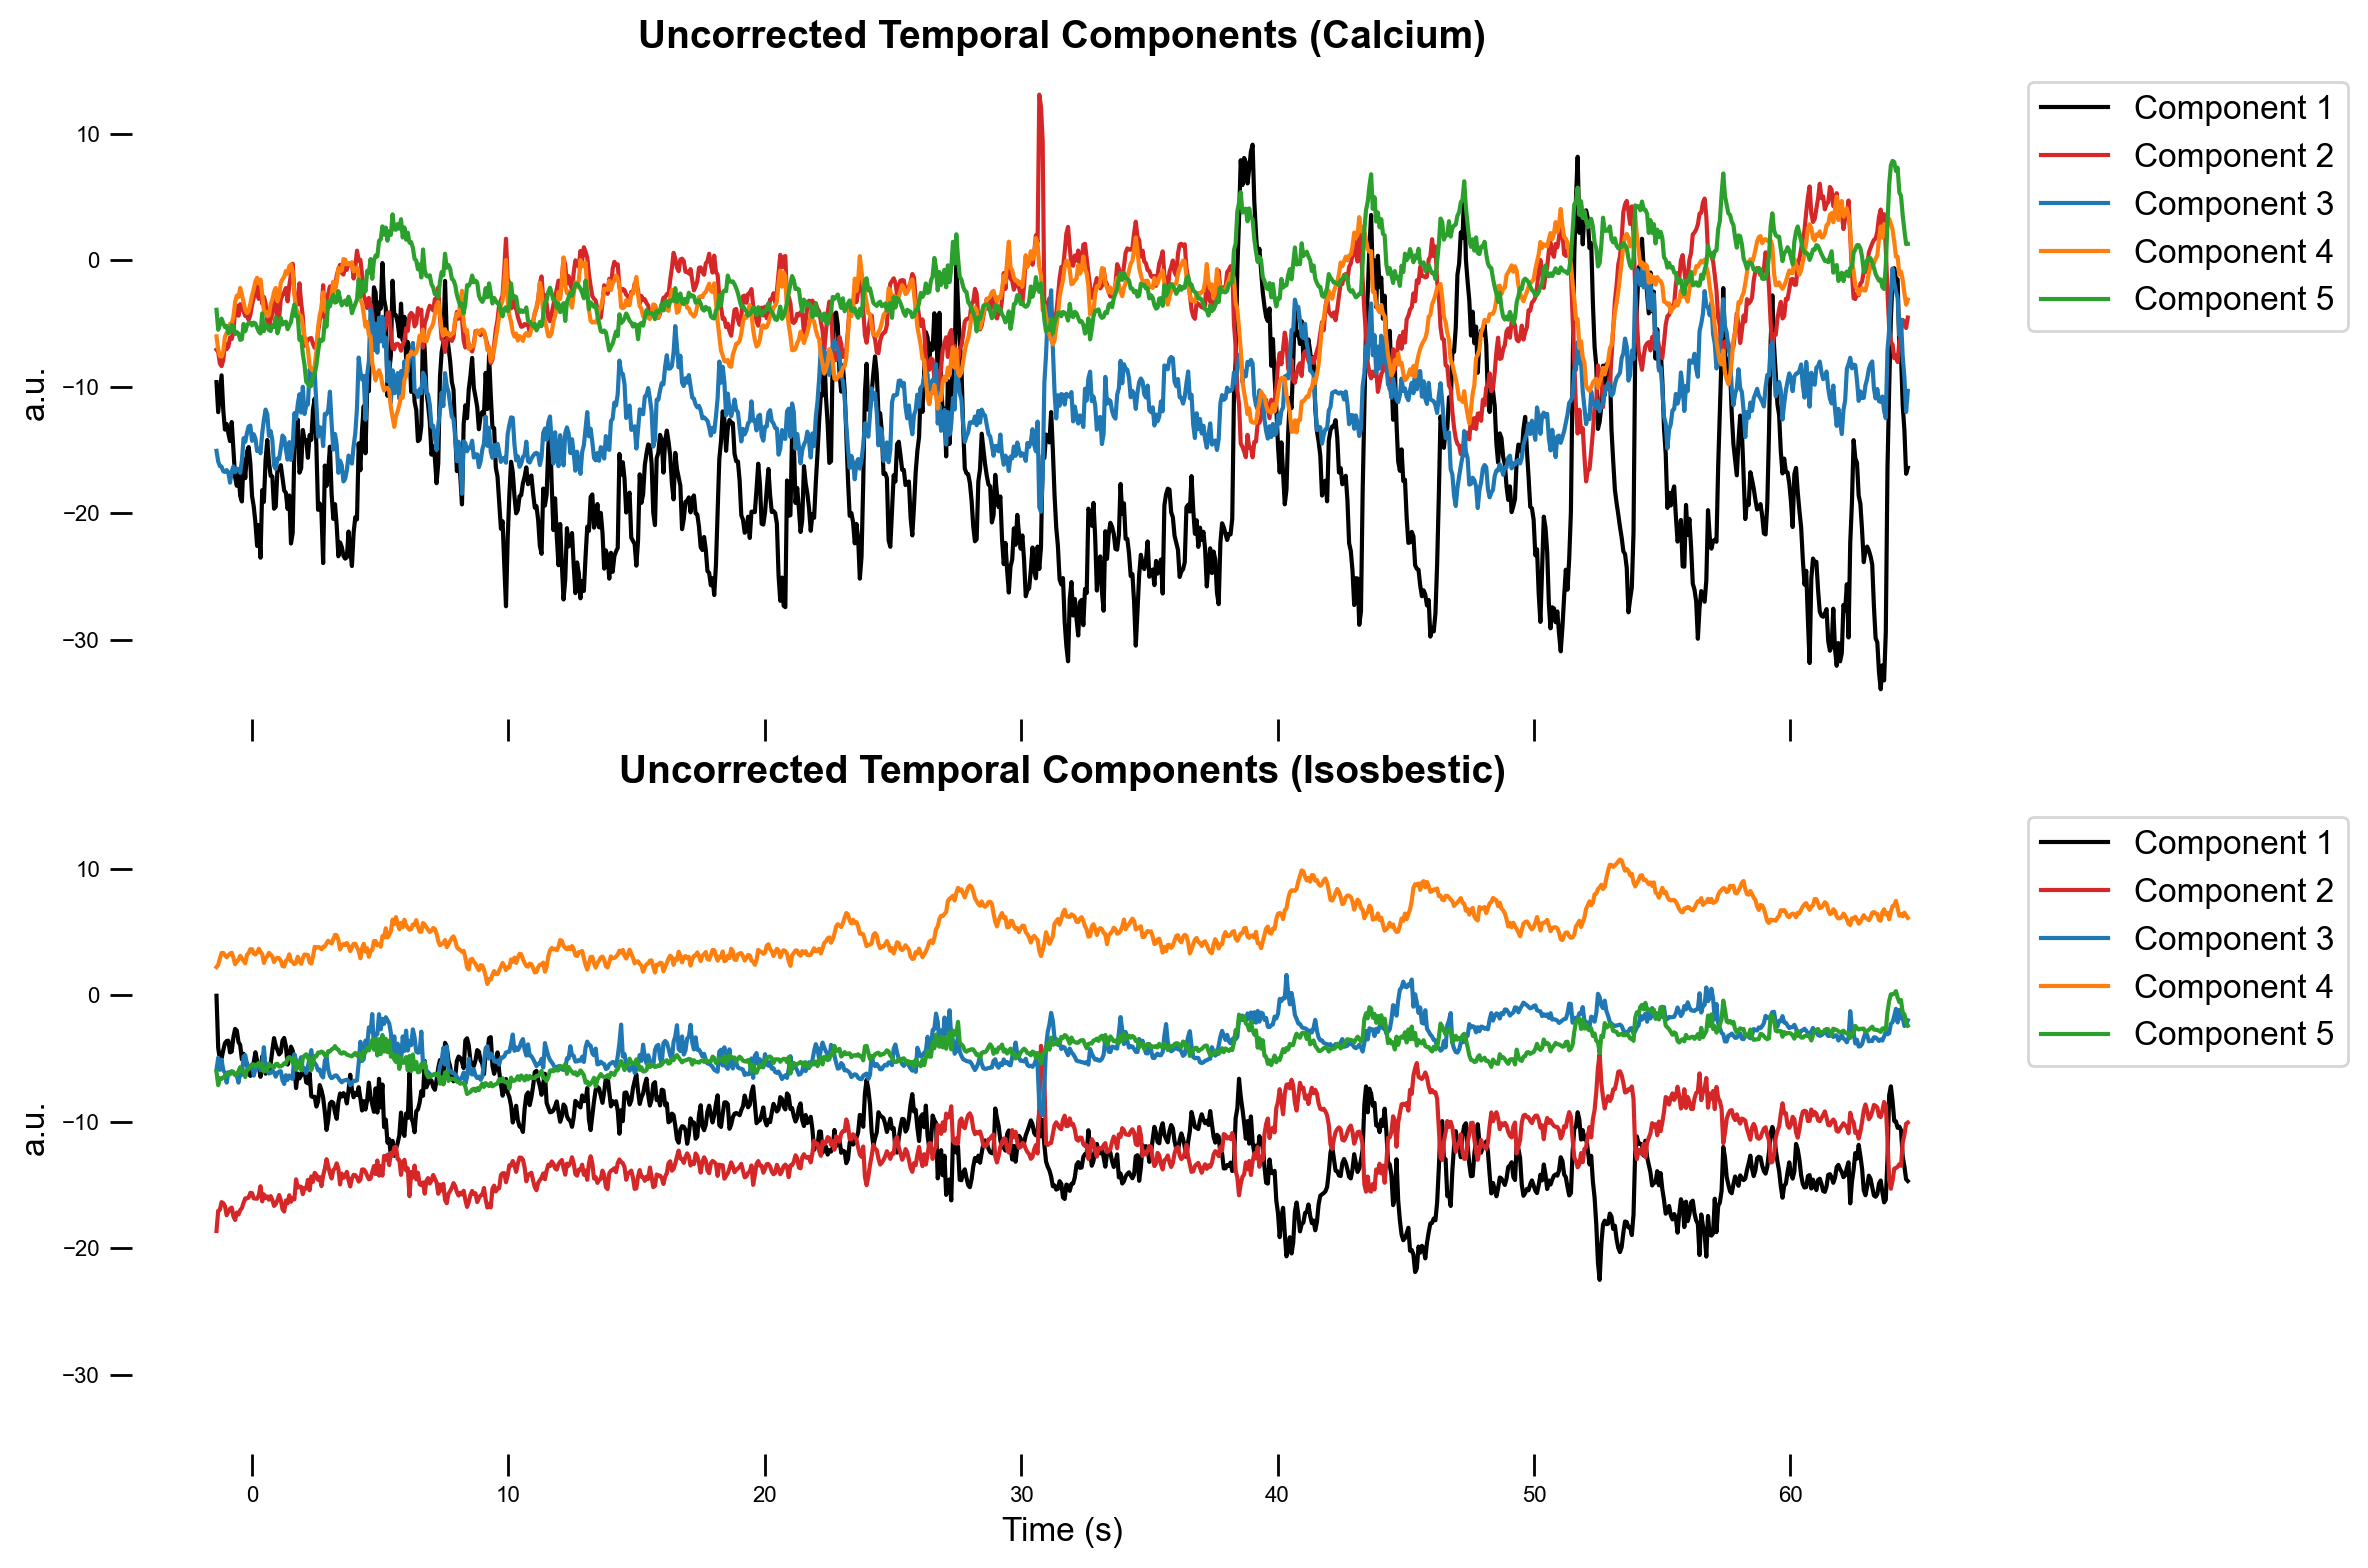

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), dpi=200, sharex=True, sharey=True)

num_rois = 5
roi_response = fluorescence_module.roi_response_series["RoiResponseSeries"]
time = roi_response.timestamps[:1000]  # First 1000 time points
for roi_idx in range(num_rois):  # Plot first 5 ROIs
    ax[0].plot(time, roi_response.data[:1000, roi_idx], label=f'Component {roi_idx+1}')
ax[0].set_title('Uncorrected Temporal Components (Calcium)')
ax[0].set_ylabel('a.u.')
ax[0].legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax[0].set_frame_on(False)

roi_response_iso = fluorescence_module.roi_response_series["RoiResponseSeriesIsosbestic"]
for roi_idx in range(num_rois):  # Plot first 5 ROIs
    ax[1].plot(time, roi_response_iso.data[:1000, roi_idx], label=f'Component {roi_idx+1}')
ax[1].set_title('Uncorrected Temporal Components (Isosbestic)')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('a.u.')
ax[1].legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax[1].set_frame_on(False)
plt.tight_layout()

## Haemocorrected temporal components

The haemocorrected temporal components tracesthe `ophys` processing module as `RoiResponseSeries` object within the "DfOverF" container.

Data shape
- Arrays are shaped `(time, num_components)` — the first dimension is time, the second is the number of components.

Series names
- Calcium (470 nm): `RoiResponseSeries`

Access example
```python
response_series = nwbfile.processing["ophys"]["DfOverF"]["RoiResponseSeries"]
```

In [25]:
print(f"=== Haemocorrected temporal components ===")
print("-" * 100)
roi_response = nwbfile.processing["ophys"]["DfOverF"]["RoiResponseSeries"]
print(f"Trace: {roi_response.name}")
print("-" * 100)
print(f"   Description: {roi_response.description}")
print(f"   Number of ROIs: {roi_response.data.shape[1]}")
print(f"   Duration: {roi_response.timestamps[-1] - roi_response.timestamps[0]:.2f} seconds")
print("-" * 100)

=== Haemocorrected temporal components ===
----------------------------------------------------------------------------------------------------
Trace: RoiResponseSeries
----------------------------------------------------------------------------------------------------
   Description: Df/F traces for widefield calcium imaging.
   Number of ROIs: 200
   Duration: 4989.12 seconds
----------------------------------------------------------------------------------------------------


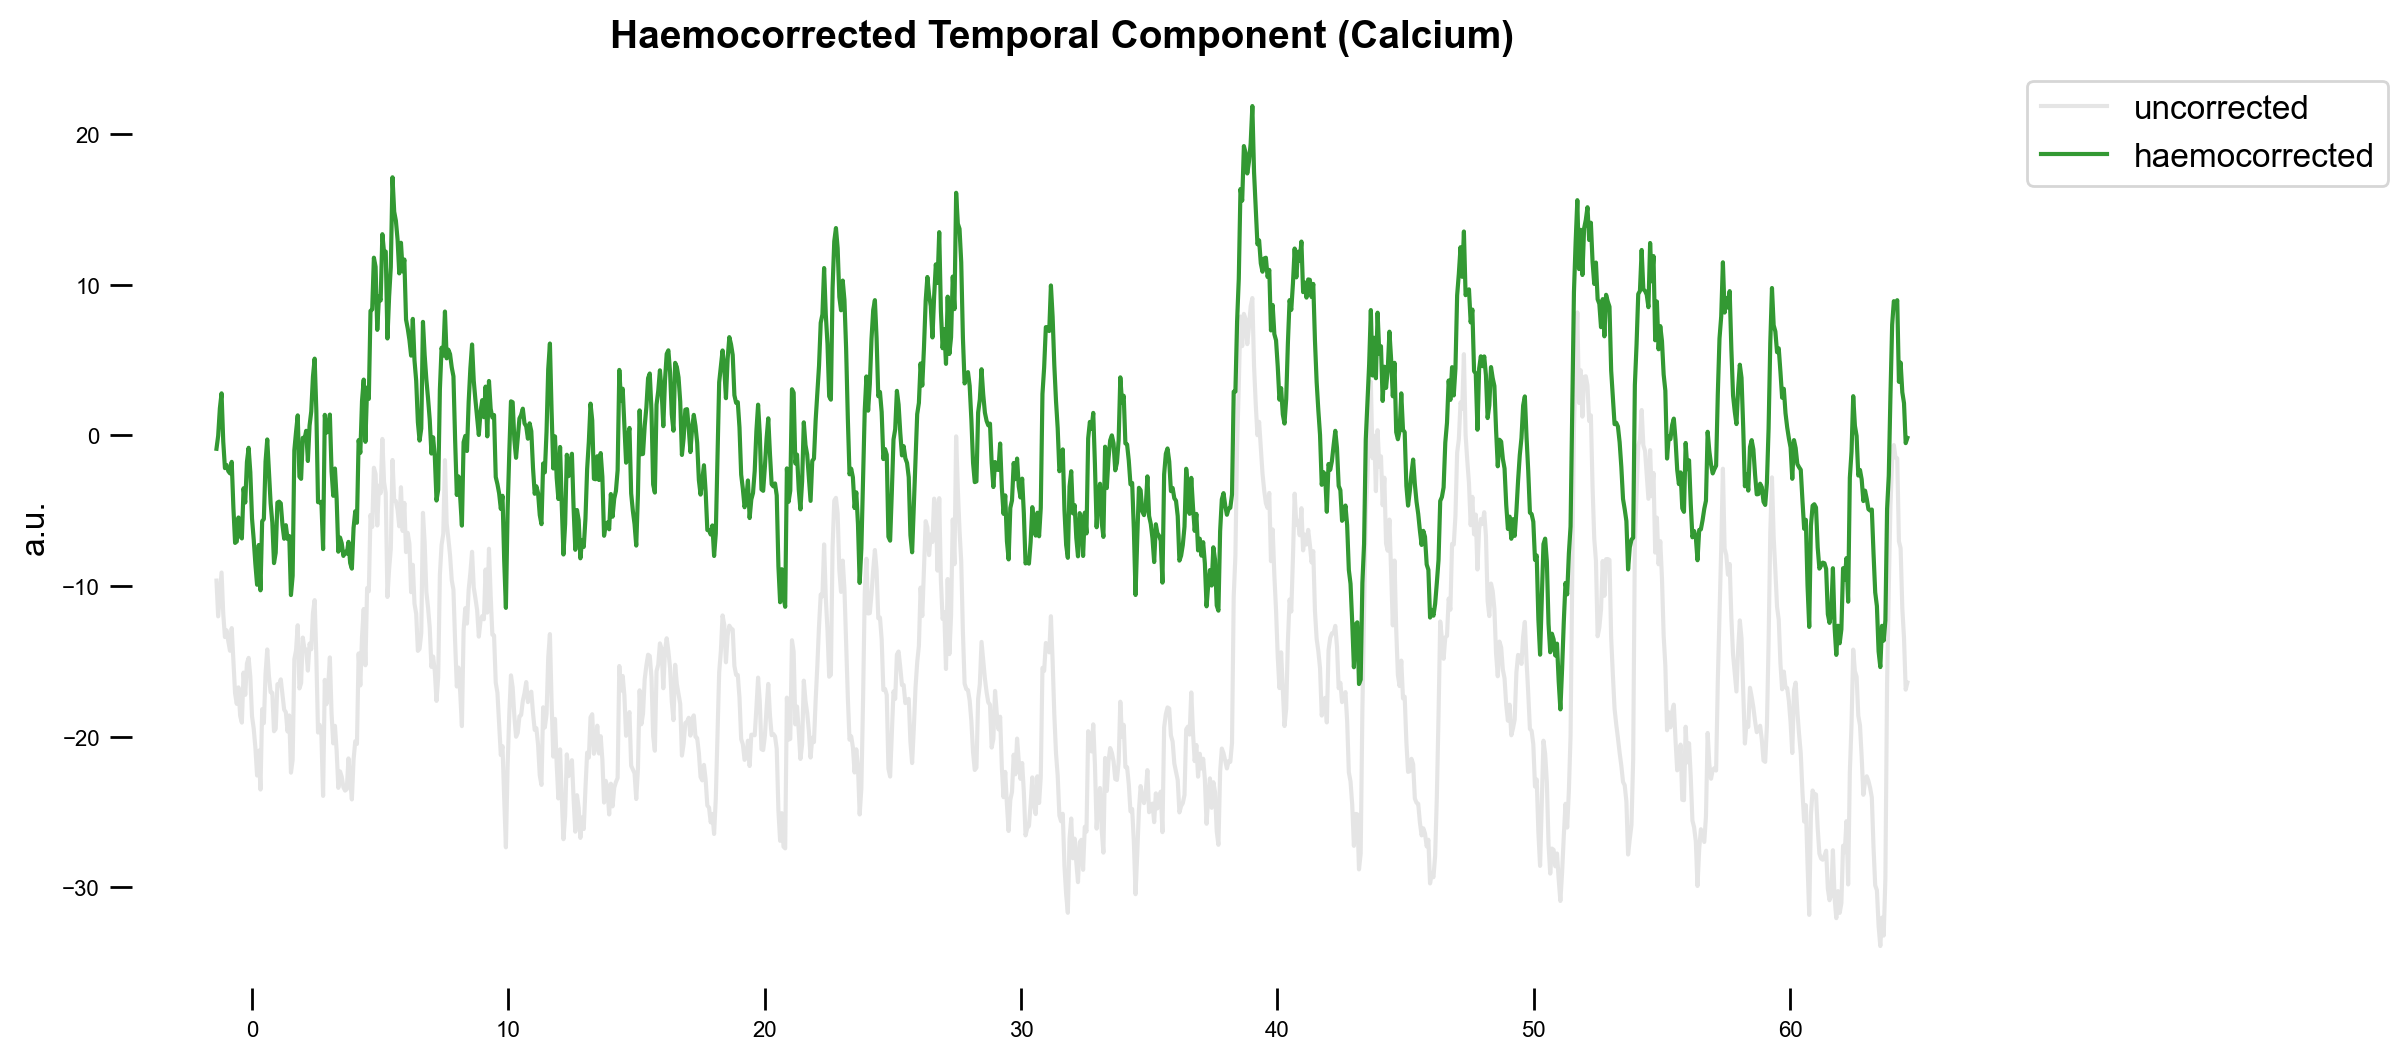

In [28]:
fig, ax = plt.subplots(dpi=200)

roi_response_raw = nwbfile.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]
roi_response_dff = nwbfile.processing["ophys"]["DfOverF"]["RoiResponseSeries"]

time = roi_response_raw.timestamps[:1000]  # First 1000 time points
ax.plot(time, roi_response_raw.data[:1000, 0], label="uncorrected", color="grey", alpha=0.2)
ax.plot(time, roi_response_dff.data[:1000, 0], label="haemocorrected", color="green", alpha=0.8)
ax.set_title('Haemocorrected Temporal Component (Calcium)')
ax.set_ylabel('a.u.')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax.set_frame_on(False)

The image masks for each field are stored in `PlaneSegmentation` objects in an `ImageSegmentation` container within the "ophys" processing module.

In [30]:
print(f"=== Spatial Components: ===")
print("-" * 100)
segmentation_module = nwbfile.processing["ophys"]["ImageSegmentation"]
for _, plane_segmentation in segmentation_module.plane_segmentations.items():
    print(f"Plane Segmentation: {plane_segmentation.name}")
    print("-" * 100)
    print(f"   Description: {plane_segmentation.description}")
    print(f"   Linked Imaging Plane: {plane_segmentation.imaging_plane.name}")
    print(f"   ROIs properties: {plane_segmentation.colnames}")
    print("-" * 100)

=== Spatial Components: ===
----------------------------------------------------------------------------------------------------
Plane Segmentation: PlaneSegmentationCalcium
----------------------------------------------------------------------------------------------------
   Description: Spatial components of segmented ROIs for widefield calcium imaging.
   Linked Imaging Plane: ImagingPlaneCalcium
   ROIs properties: ('roi_name', 'image_mask', 'ROICentroids', 'Accepted', 'Rejected')
----------------------------------------------------------------------------------------------------
Plane Segmentation: PlaneSegmentationIsosbestic
----------------------------------------------------------------------------------------------------
   Description: Spatial components of segmented ROIs for widefield calcium imaging.
   Linked Imaging Plane: ImagingPlaneIsosbestic
   ROIs properties: ('roi_name', 'image_mask', 'ROICentroids', 'Accepted', 'Rejected')
----------------------------------------

In [14]:
plane_segmentation = segmentation_module["PlaneSegmentationCalcium"]
# view plane segmentation table
plane_segmentation.to_dataframe()

roi_name                                         image_mask ROICentroids  \
id                                                                             
0          0  [[0.049625162, 0.0011296909, 0.00017280084, 0....       [0, 0]   
1          1  [[0.06113025, 0.0025354389, 0.00032267574, 0.0...       [0, 0]   
2          2  [[-0.0446905, 0.0034765417, 0.0031803476, 0.00...      [13, 0]   
3          3  [[0.009191629, -0.0011995536, 0.0005059285, 0....     [639, 1]   
4          4  [[-0.010197174, -0.001696229, -0.0015303317, -...     [639, 0]   
..       ...                                                ...          ...   
195      195  [[0.030825567, 0.0007401949, 0.0051637534, 0.0...       [3, 0]   
196      196  [[-0.007716487, -0.008468762, -0.001872062, -0...      [13, 0]   
197      197  [[0.011774059, 0.0035459548, 0.0057158666, 0.0...       [9, 0]   
198      198  [[0.003368729, -0.004077673, 0.0013265987, 0.0...      [10, 0]   
199      199  [[-0.0029760823, -0.0027478084, 0.0028319831, ...   [298, 190]   

     Accepted  Rejected  
id                       
0           1         0  
1           1         0  
2           1         0  
3           1         0  
4           1         0  
..        ...       ...  
195         1         0  
196         1         0  
197         1         0  
198         1         0  
199         1         0  

[200 rows x 5 columns]

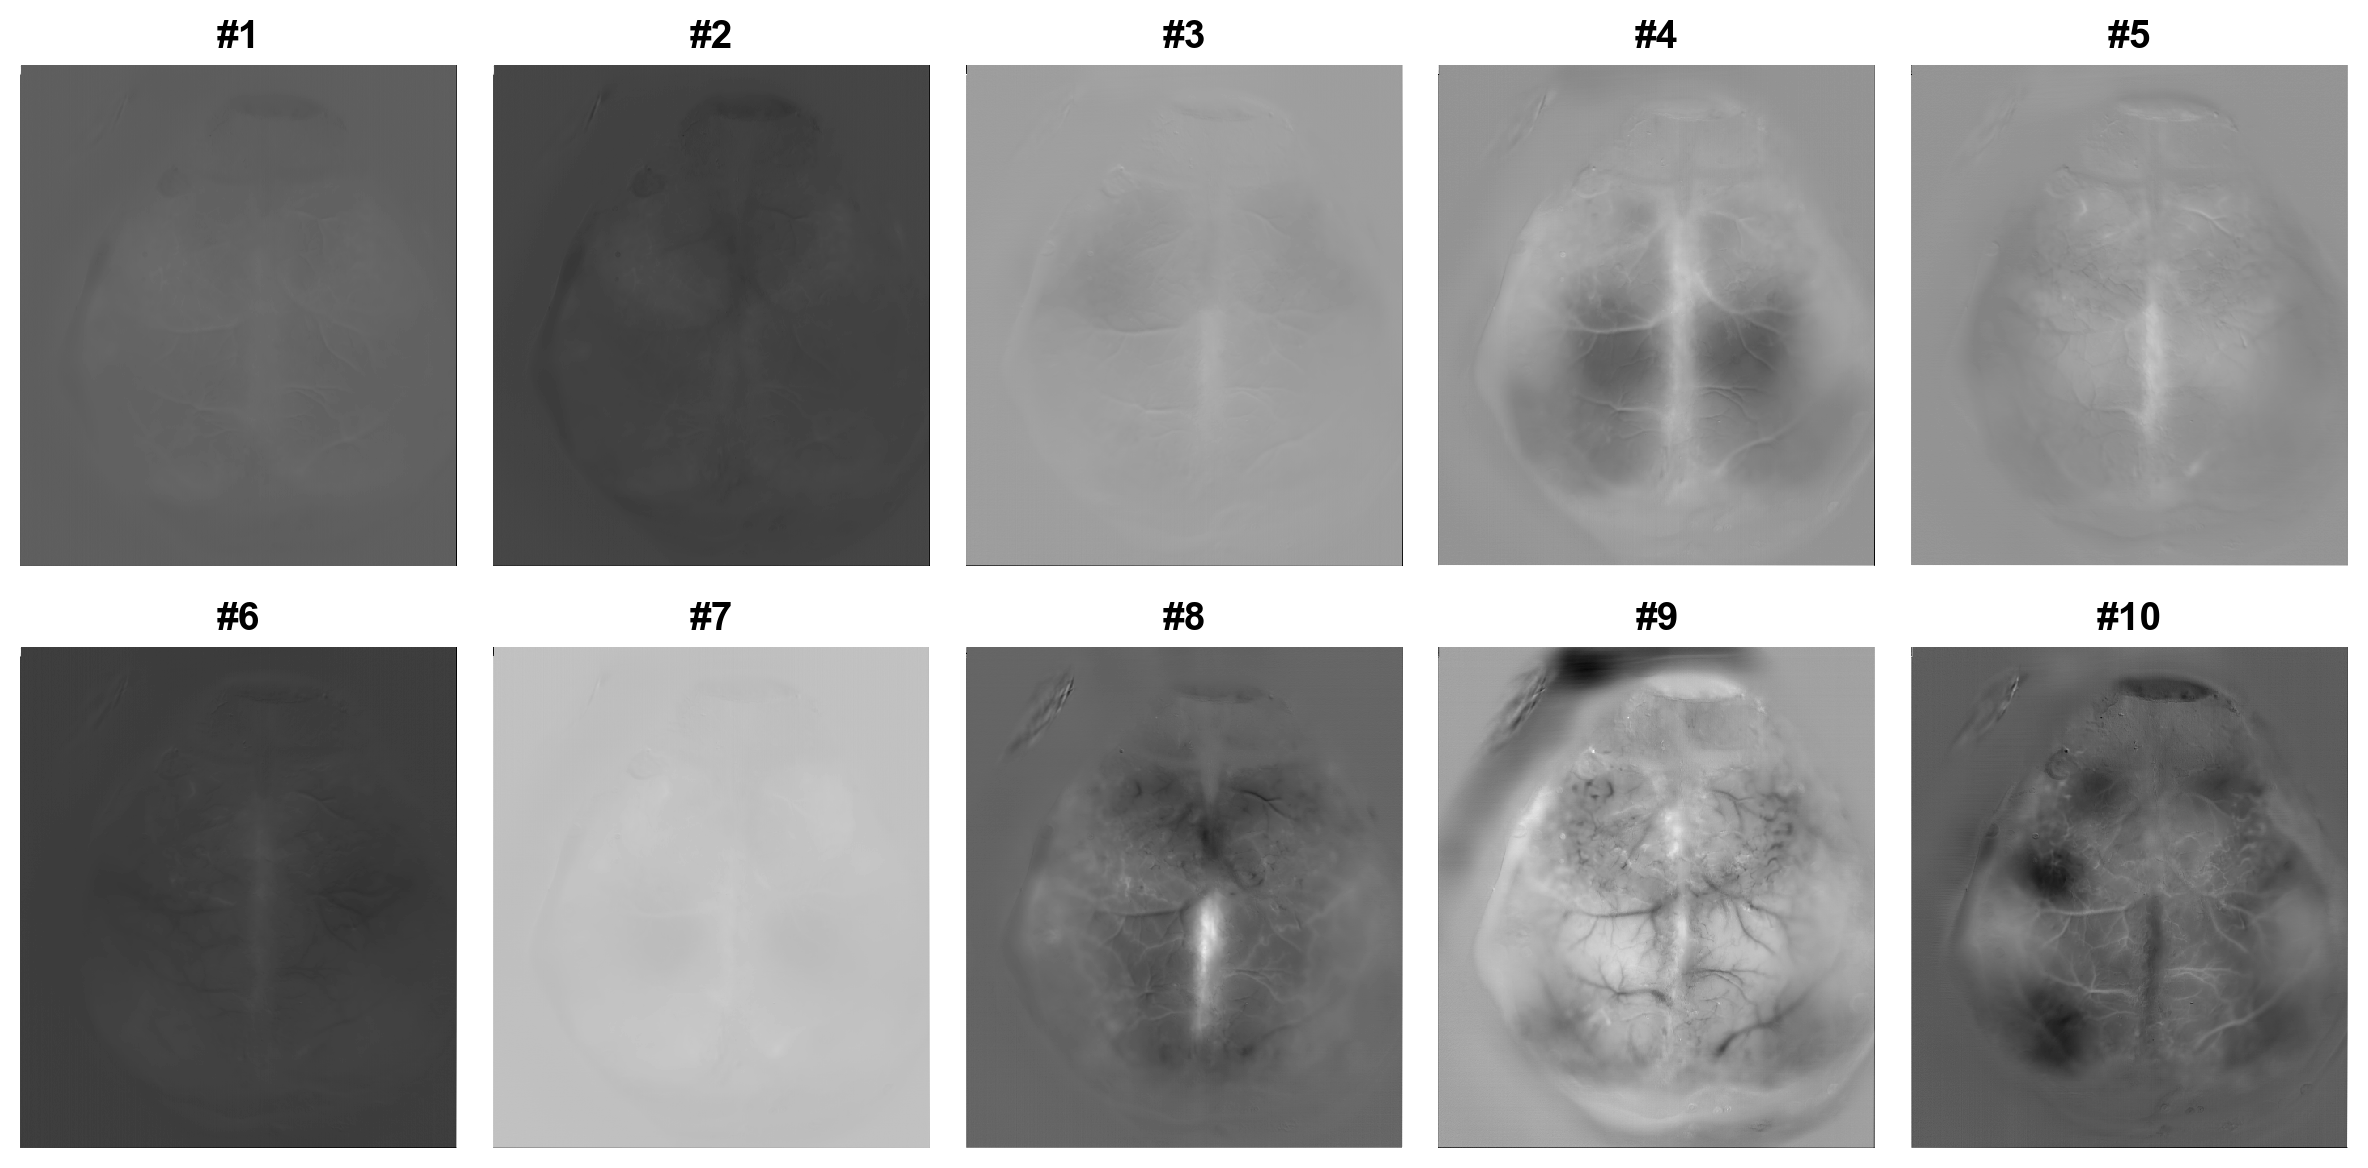

In [36]:
# view example image mask for ROIs
# random 10 ROI masks
roi_ids = range(10)

fig, axes = plt.subplots(2, 5, sharex=True, sharey=True, dpi=200)
for ax, roi_id in zip(axes.flatten(), roi_ids):
    ax.imshow(plane_segmentation["image_mask"][roi_id], cmap="gray", aspect="auto")
    ax.set_title(f'#{roi_id + 1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

The summary images from the segmentation are stored in GrayscaleImage objects in an Images container within the "ophys" processing module.


In [6]:
print(f"=== SUMMARY IMAGES: ===")
print("-" * 100)
segmentation_images = nwbfile.processing["ophys"]["SegmentationImages"]
for _, summary_image in segmentation_images.images.items():
    print(f"Image: {summary_image.name}")
    print("-" * 100)
    print(f"   Description: {summary_image.description}")
    print(f"   Dimensions: {summary_image.data.shape}")
    print("-" * 100)

=== SUMMARY IMAGES: ===
----------------------------------------------------------------------------------------------------
Image: MeanImage
----------------------------------------------------------------------------------------------------
   Description: The mean image under Blue (470 nm) excitation across the imaging session.
   Dimensions: (640, 540)
----------------------------------------------------------------------------------------------------
Image: MeanImageIsosbestic
----------------------------------------------------------------------------------------------------
   Description: The mean image under Violet (405 nm) excitation across the imaging session.
   Dimensions: (640, 540)
----------------------------------------------------------------------------------------------------


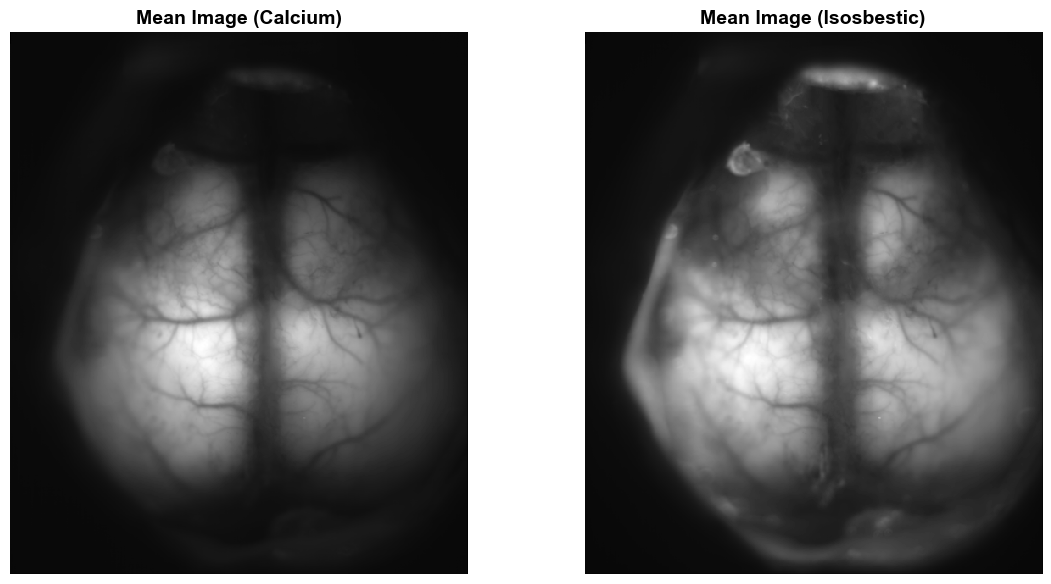

In [7]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)

mean_image = segmentation_images.images["MeanImage"]
axes[0].imshow(mean_image, cmap="gray")
axes[0].set_title('Mean Image (Calcium)')
axes[0].axis('off')

mean_image_isosbestic = segmentation_images.images["MeanImageIsosbestic"]
axes[1].imshow(mean_image_isosbestic, cmap="gray")
axes[1].set_title('Mean Image (Isosbestic)')
axes[1].axis('off')
plt.tight_layout()
plt.show()

## Aligning data to the Allen reference atlas using Landmarks <a id="landmarks"></a>

The imaging stack can be reconstructed from the decomponsed spatial and temporal components of the SVD. The imaging stack contains the imaging data for each frame in the session and has dimensions (nFrames, x, y) where x is the width of the imaging window, and y the height.

In [4]:
# TODO: Landmarks should be read from the NWBfile
import wfield

landmarks_file = "/Volumes/T9/data/IBL/zadorlab/Subjects/CSK-im-011/2021-07-13/001/alf/widefield/widefieldLandmarks.dorsalCortex.json"
landmarks = wfield.load_allen_landmarks(landmarks_file)

print("=== LANDMARKS ===")
for name, coords in landmarks.items():
    print(f"{name}: {coords}")

=== LANDMARKS ===
bregma_offset: [320, 270]
landmarks:       x     y       name    color
0 -1.95 -3.45    OB_left  #fc9d03
1  0.00 -3.45  OB_center  #0367fc
2  1.95 -3.45   OB_right  #fc9d03
3  0.00  3.20   RSP_base  #fc4103
landmarks_im:             x           y       name    color
0  219.484536   92.164948    OB_left  #fc9d03
1  320.000000   92.164948  OB_center  #0367fc
2  420.515464   92.164948   OB_right  #fc9d03
3  320.000000  434.948454   RSP_base  #fc4103
landmarks_match:             x           y       name    color
0  137.337774  381.428925    OB_left  #fc9d03
1  150.764796  302.164284  OB_center  #0367fc
2  140.903437  226.593808   OB_right  #fc9d03
3  493.558386  301.863883   RSP_base  #fc4103
resolution: 0.0194
transform: <SimilarityTransform(matrix=
    [[-3.26771128e-04,  9.75583581e-01,  5.72275646e+01],
     [-9.75583581e-01, -3.26771128e-04,  6.15257591e+02],
     [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])>
transform_type: euclidian


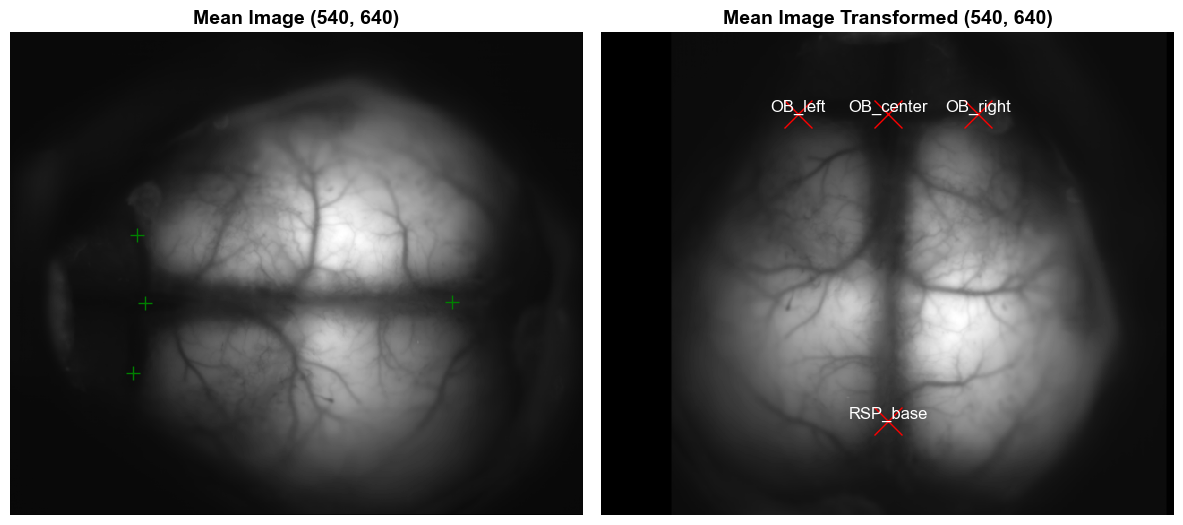

In [8]:
# Plot with matplotlib (example)
from wfield import im_apply_transform

landmarks_match = landmarks["landmarks_match"]
landmarks_im = landmarks['landmarks_im']

fig, axes = plt.subplots(1, 2, figsize=[12, 12], sharex=True, sharey=True)

mean_image = segmentation_images.images["MeanImage"].data[:]
mean_image_T = mean_image.T  # Transpose to height x width
transformed_mean_image = im_apply_transform(mean_image_T, landmarks["transform"])
axes[0].imshow(mean_image_T, cmap="gray")
axes[0].set_title(f'Mean Image {mean_image_T.shape}')
axes[0].axis('off')
axes[1].imshow(transformed_mean_image, cmap="gray")
axes[1].set_title(f'Mean Image Transformed {transformed_mean_image.shape}')
axes[1].axis('off')

for i,r in landmarks_im.iterrows():
    m = landmarks_match.loc[i]
    axes[0].plot(m.x, m.y,'g+',ms=10) # the matched coordinates in the original image space
    axes[1].plot(r.x,r.y,'rx',ms=20) # the coordinates registered to the atlas
    axes[1].text(r.x,r.y,r['name'],color='w',fontsize=12,va='bottom',ha='center')

plt.tight_layout()
plt.show()

In [126]:
print("=== Transform ===")
print("-" * 100)
M = landmarks["transform"]
print(f"Image: {segmentation_images.images["MeanImage"].name}")
print("-" * 100)
print(f"   scale: {M.scale}")
print(f"   translation: {M.translation}")
print(f"   rotation (degrees): {np.rad2deg(M.rotation)}")


=== Transform ===
----------------------------------------------------------------------------------------------------
Image: MeanImage
----------------------------------------------------------------------------------------------------
   scale: 0.9755836358284588
   translation: [ 57.22756464 615.25759085]
   rotation (degrees): -90.01919118584904


In [20]:
# Load the spatial components
U = plane_segmentation["image_mask"].data[:]
print(f"Spatial components shape: {U.shape}")
# Load the haemocorrected temporal components
SVT = roi_response_dff.data[:]
print(f"Temporal components shape: {SVT.shape}")
# Use wfield package to build imaging stack
stack = wfield.SVDStack(U.T, SVT.T) # this then needs to be added to the NWB file
print(f"Reconstructed stack shape: {stack.shape}")

Spatial components shape: (200, 640, 540)
Temporal components shape: (75569, 200)
Reconstructed stack shape: [75569, 540, 640]


In [21]:
# Warp and register the image stack to the Allen dorsal cortex
stack.set_warped(True, M=landmarks['transform'])

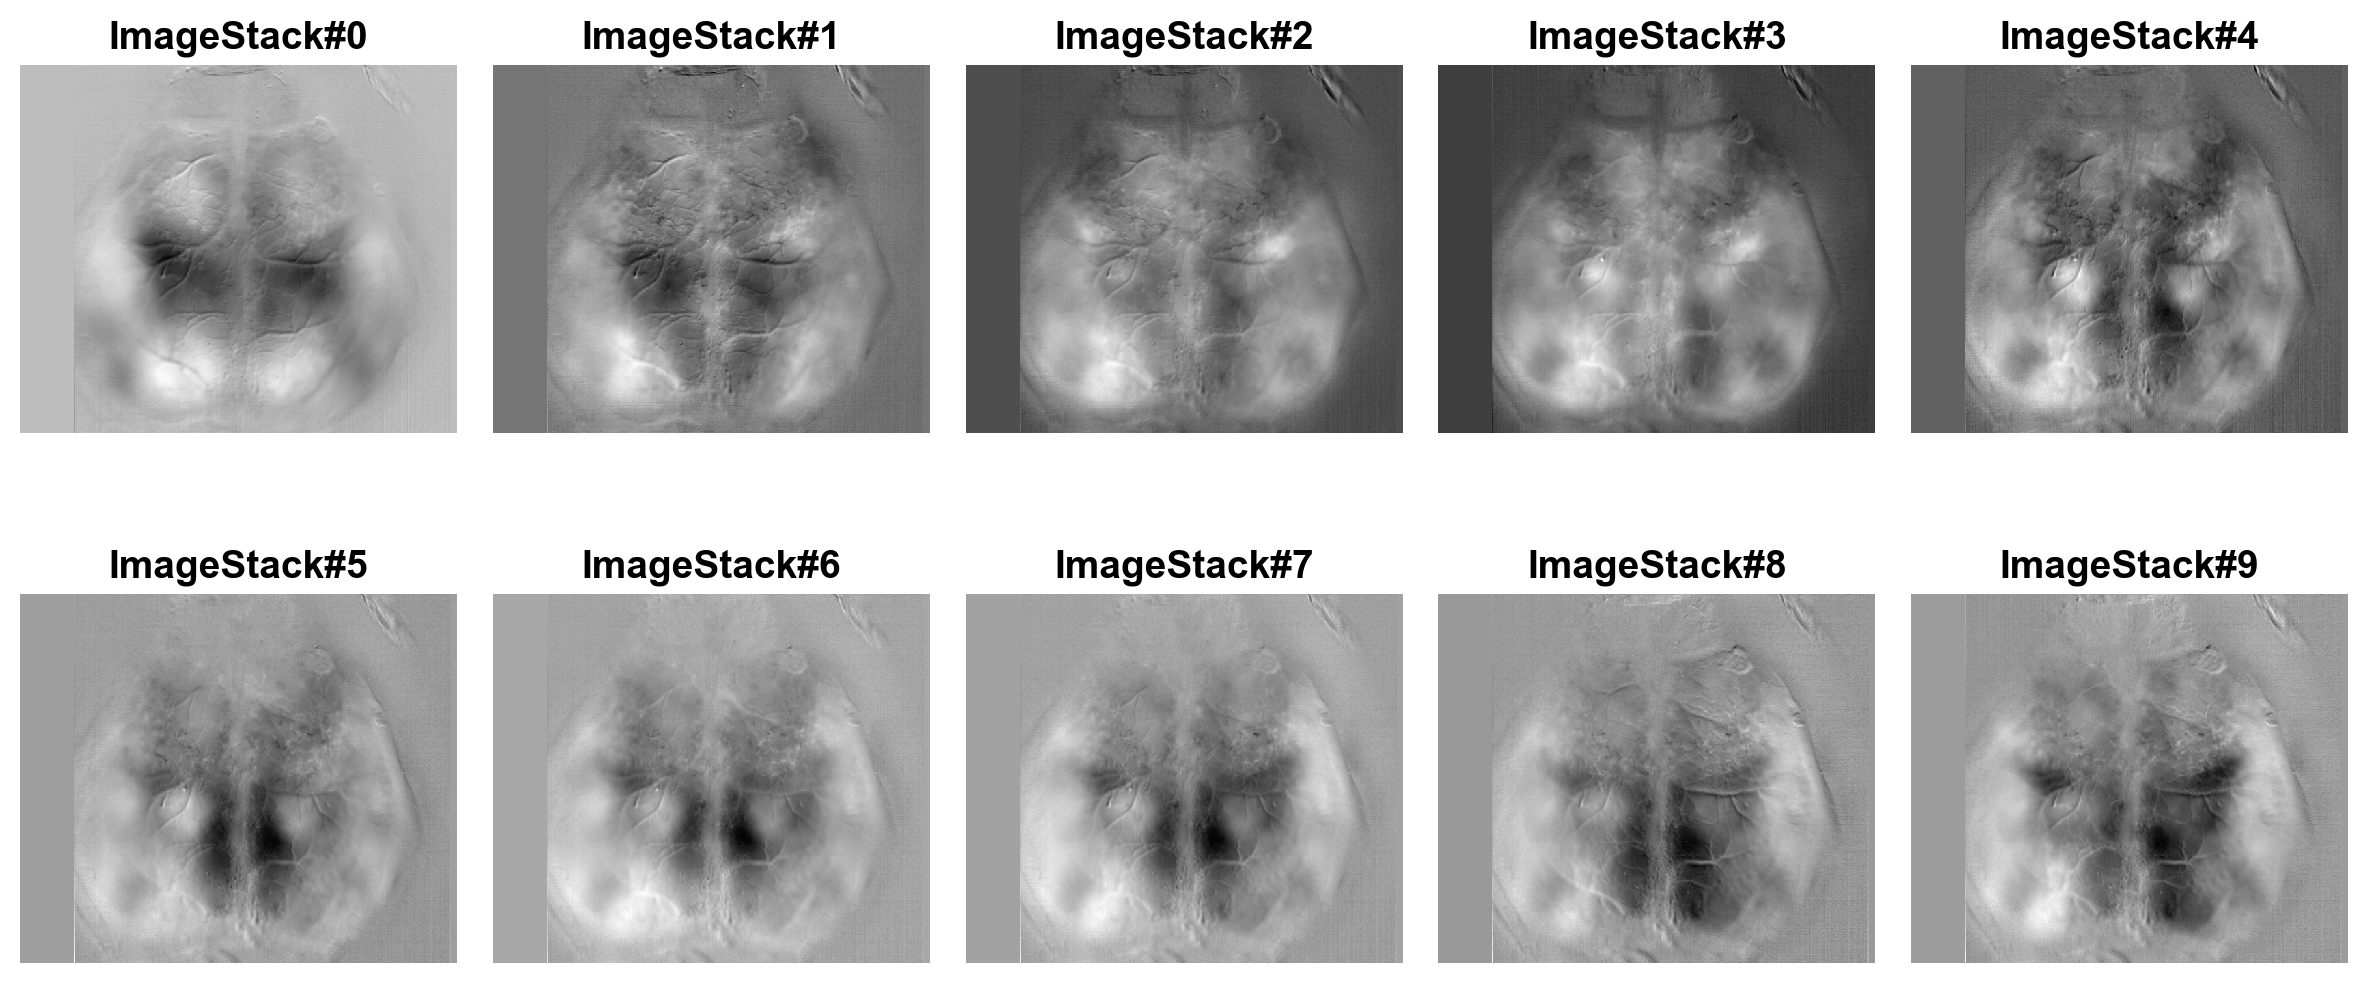

In [22]:
# first 10 frames
frames = range(10)

fig, axes = plt.subplots(2, 5, sharex=True, sharey=True, dpi=200)
for ax, frame_ind in zip(axes.flatten(), frames):
    ax.imshow(stack[frame_ind], cmap="gray")
    ax.set_title(f'ImageStack#{frame_ind}')
    ax.axis('off')
plt.tight_layout()
plt.show()


- Change to having SVD component instead of ROIs they are components not ROIs
- Add another OnePhotonSeries that is called heamocorrected or processed OnePhotonSeries and save the stack
- Discuss with Mayo how to add the landmarks

